In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    x = x.reshape((-1,1))
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall(x_out,W)
    return x_out

def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E

/home/karsten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Text(0.5, 1.0, 'Energy state development for recalled p1')

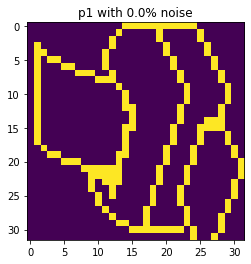

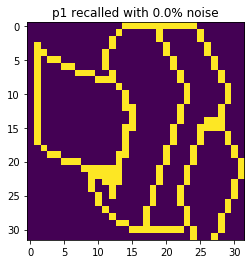

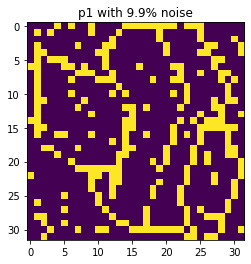

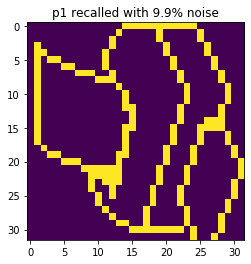

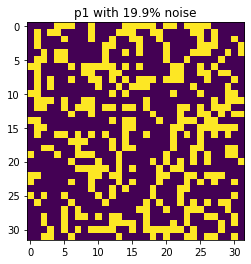

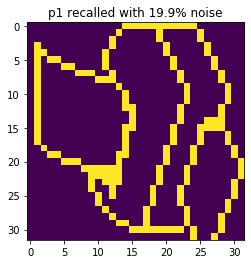

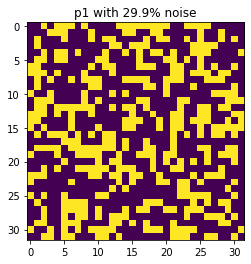

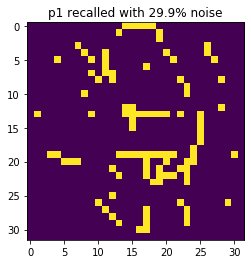

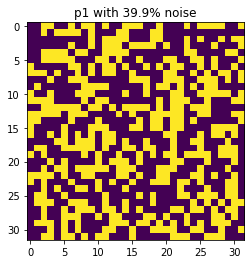

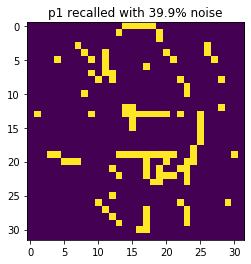

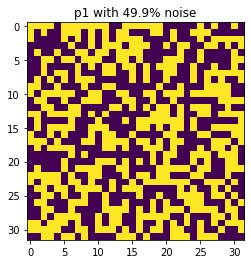

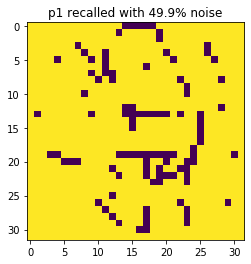

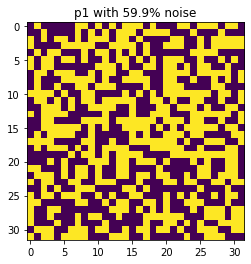

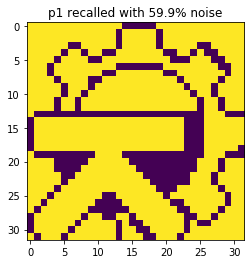

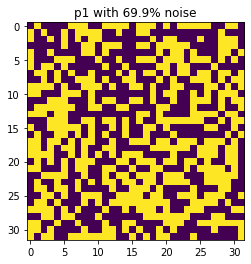

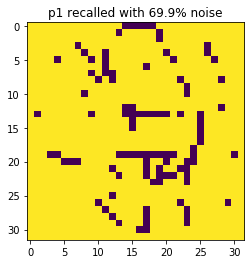

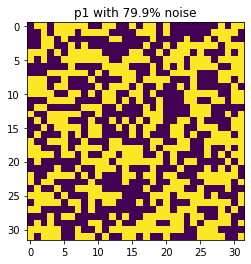

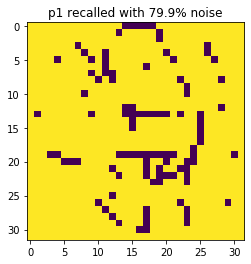

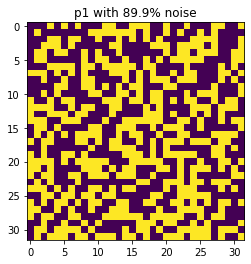

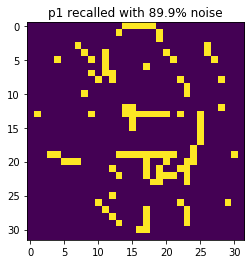

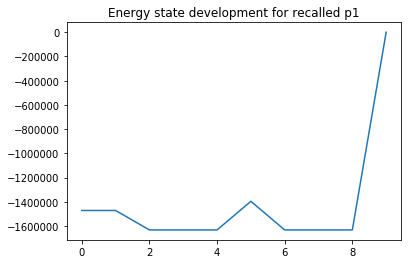

In [5]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
data = data.reshape(-1,1024)

#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

x = data[0]

epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    plt.title('p1 with '+str(i/10)+'% noise')
    
    xr = find_pattern(x,W,epochs)
    
    plt.figure()
    plt.imshow(xr.reshape((32,32)))
    plt.title('p1 recalled with '+str(i/10)+'% noise')
    
    E = calculate_energy(xr,W)
    energy_s[int(i/100)] = E

plt.figure()
plt.plot(np.arange(10),energy_s)
plt.title('Energy state development for recalled p1')

Inte helt tydligt var gränsen går men runt 250st kan vi shifta tecken på och fortfarande få ut bilden.

/home/karsten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Text(0.5, 1.0, 'Energy state development for recalled p2')

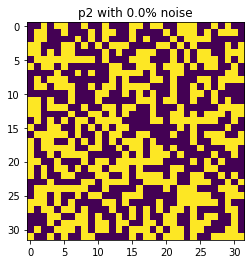

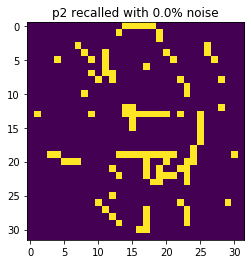

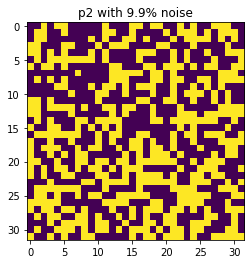

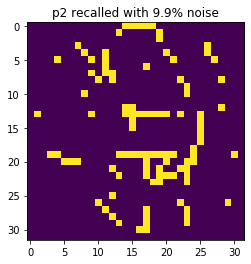

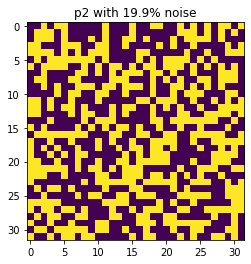

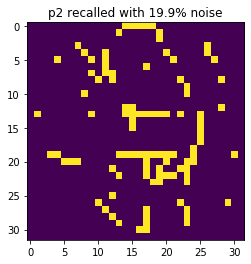

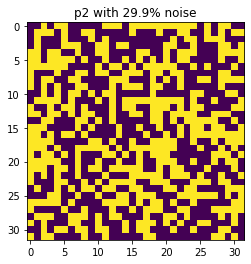

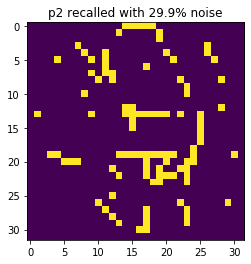

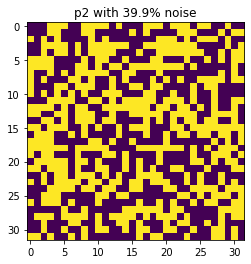

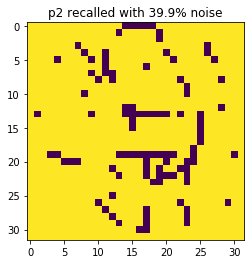

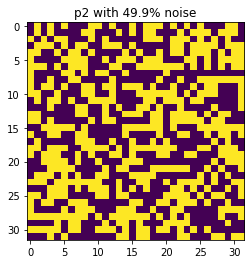

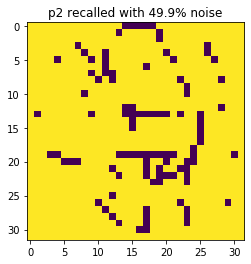

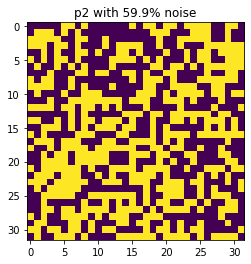

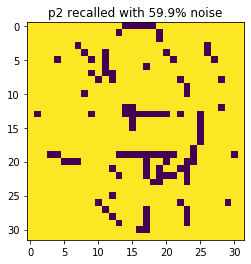

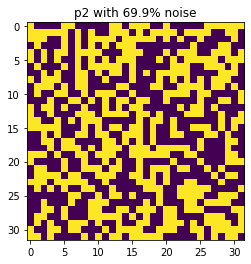

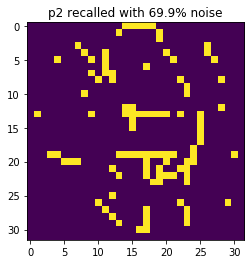

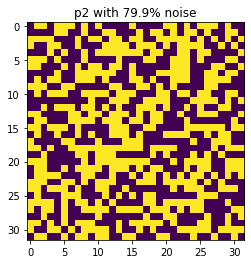

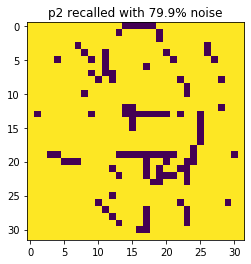

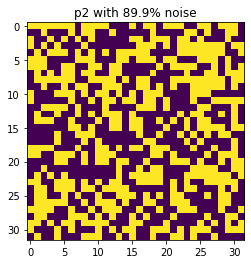

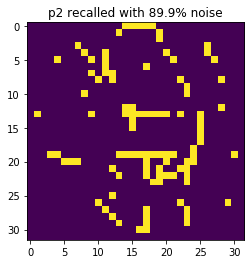

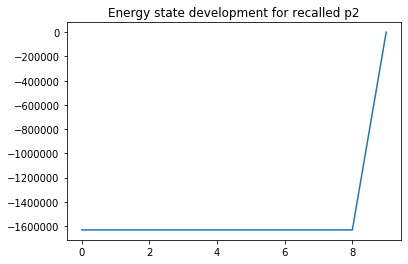

In [8]:
x = data[1]

epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
        
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    plt.title('p2 with '+str(i/10)+'% noise')
    
    xr = find_pattern(x,W,epochs)
    
    plt.figure()
    plt.imshow(xr.reshape((32,32)))
    plt.title('p2 recalled with '+str(i/10)+'% noise')
    
    E = calculate_energy(xr,W)
    energy_s[int(i/100)] = E
    
plt.figure()
plt.plot(np.arange(10),energy_s)
plt.title('Energy state development for recalled p2')

/home/karsten/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Text(0.5, 1.0, 'Energy state development for recalled p3')

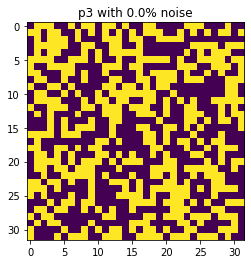

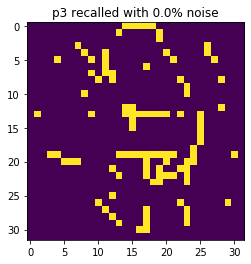

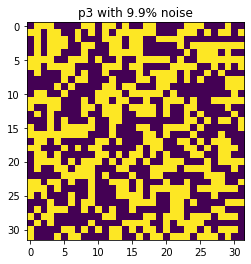

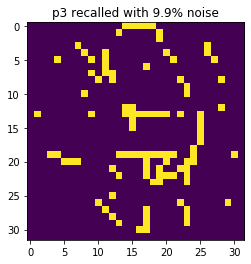

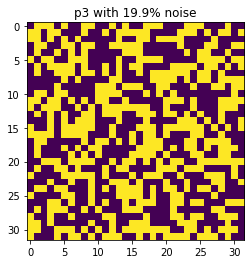

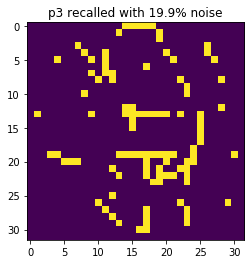

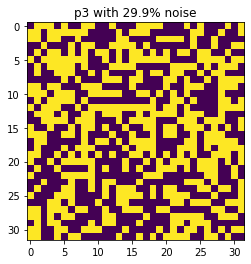

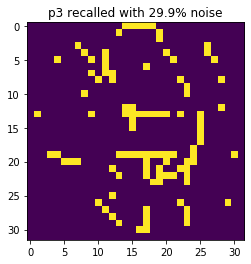

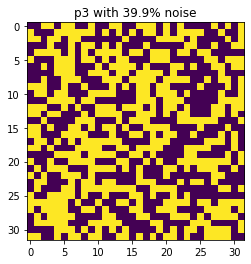

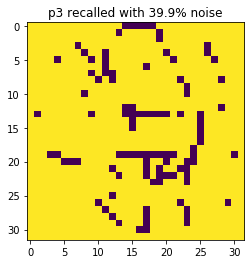

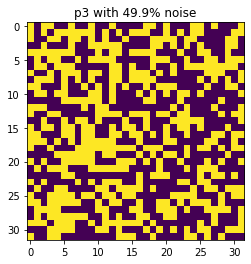

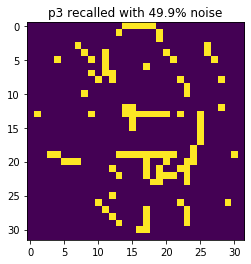

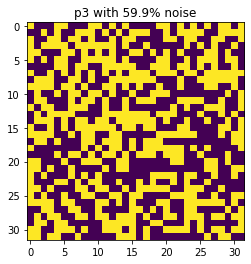

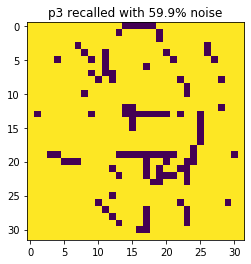

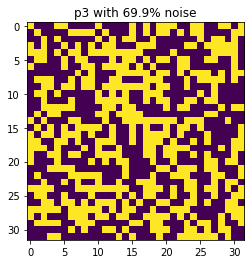

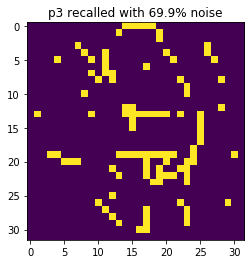

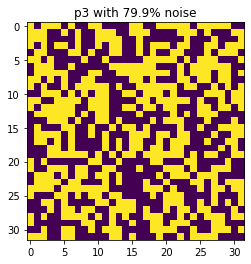

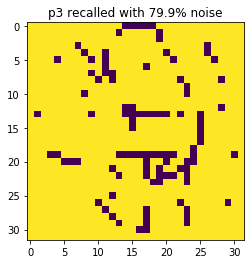

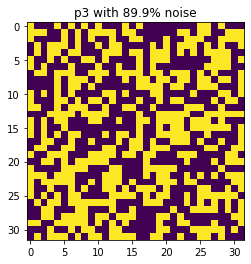

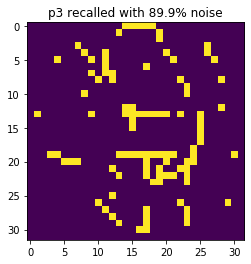

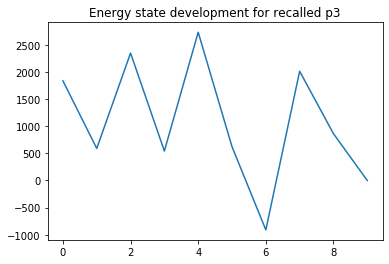

In [9]:
x = data[2]

epochs = 10
energy_s = np.zeros(10)

for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    plt.title('p3 with '+str(i/10)+'% noise')
    
    xr = find_pattern(x,W,epochs)

    plt.figure()
    plt.imshow(xr.reshape((32,32)))
    plt.title('p3 recalled with '+str(i/10)+'% noise')
    
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
    
plt.figure()
plt.plot(np.arange(10),energy_s)
plt.title('Energy state development for recalled p3')

In [ ]:
Någonstans vid 20-30% noise så blir det knas för alla utom nummer tre. Den blir destroyed direkt.